In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置路径
DATA_PATH = "G:/DSP DATA SET/"
SAVE_PATH = "C:/Users/dell/Desktop/DSP/pictures/"

sns.set(style="whitegrid")

# === 读取主数据 ===
df = pd.read_csv(DATA_PATH + "df_final.csv")

# 图1：点击量 vs 退学状态（箱线图）
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='total_clicks_28d', data=df)
plt.title('Total Clicks in First 28 Days by Dropout Status')
plt.xlabel('Dropout (1 = Yes, 0 = No)')
plt.ylabel('Total Clicks')
plt.tight_layout()
plt.savefig(SAVE_PATH + "fig1_clicks_boxplot.png")
plt.close()

# 图2：作业提交情况 vs 退学状态（柱状图）
df['has_submitted'] = df['num_submitted_early'] > 0
submission_counts = df.groupby(['has_submitted', 'target']).size().reset_index(name='count')
submission_pivot = submission_counts.pivot(index='has_submitted', columns='target', values='count')
submission_pivot.plot(kind='bar', stacked=False, figsize=(6, 4))
plt.title('Assignment Submission vs Dropout')
plt.xlabel('Has Submitted (First 28 Days)')
plt.ylabel('Number of Students')
plt.legend(title='Dropout')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(SAVE_PATH + "fig2_assignment_submission_bar.png")
plt.close()

# 图3：点击趋势图（前28天）
student_vle = pd.read_csv(DATA_PATH + "studentVle.csv")
student_info = pd.read_csv(DATA_PATH + "studentInfo.csv")
student_info['target'] = student_info['final_result'].apply(lambda x: 1 if x == 'Withdrawn' else 0)

merged = student_vle.merge(
    student_info[['id_student', 'code_module', 'code_presentation', 'target']],
    on=['id_student', 'code_module', 'code_presentation'],
    how='left'
)
merged = merged[merged['date'] <= 28]
avg_clicks_per_day = merged.groupby(['date', 'target'])['sum_click'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='sum_click', hue='target', data=avg_clicks_per_day)
plt.title('Average Clicks per Day by Dropout Status')
plt.xlabel('Day')
plt.ylabel('Average Clicks')
plt.legend(title='Dropout')
plt.tight_layout()
plt.savefig(SAVE_PATH + "fig3_daily_clicks_lineplot.png")
plt.close()

# 图4：模块退学率
module_dropout = df.groupby('code_module')['target'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='code_module', data=module_dropout)
plt.xlabel('Dropout Rate')
plt.ylabel('Course Module')
plt.title('Dropout Rate by Course Module')
plt.tight_layout()
plt.savefig(SAVE_PATH + "fig4_module_dropout_bar.png")
plt.close()

# 图5：资源类型点击分布 vs 退学状态
resource_cols = [col for col in df.columns if col.startswith('resource_clicks_')]
resource_melted = df.melt(id_vars=['target'], value_vars=resource_cols,
                          var_name='resource_type', value_name='clicks')
resource_grouped = resource_melted.groupby(['resource_type', 'target'])['clicks'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='clicks', y='resource_type', hue='target', data=resource_grouped)
plt.xlabel('Average Clicks')
plt.ylabel('Resource Type')
plt.title('Average Clicks per Resource Type by Dropout Status')
plt.legend(title='Dropout')
plt.tight_layout()
plt.savefig(SAVE_PATH + "fig5_resource_clicks_bar.png")
plt.close()


In [4]:
# 继续检查其他数据表缺失值情况
print("studentAssessment.csv 缺失值情况：")
pd.read_csv(f"{DATA_PATH}/studentAssessment.csv").isna().sum()

print("studentRegistration.csv 缺失值情况：")
pd.read_csv(f"{DATA_PATH}/studentRegistration.csv").isna().sum()

print("studentVle.csv 缺失值情况：")
pd.read_csv(f"{DATA_PATH}/studentVle.csv").isna().sum()

print("vle.csv 缺失值情况：")
pd.read_csv(f"{DATA_PATH}/vle.csv").isna().sum()


studentAssessment.csv 缺失值情况：
studentRegistration.csv 缺失值情况：
studentVle.csv 缺失值情况：
vle.csv 缺失值情况：


id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [5]:
# 退学样本比例计算（可运行确认）
student_info = pd.read_csv("G:/DSP DATA SET/studentInfo.csv")
dropout_ratio = (student_info['final_result'] == 'Withdrawn').mean()
print(f"Dropout rate: {dropout_ratio:.2%}")


Dropout rate: 31.16%


In [6]:
import pandas as pd

data_path = "G:/DSP DATA SET"

# 加载数据
student_info = pd.read_csv(f"{data_path}/studentInfo.csv")
student_registration = pd.read_csv(f"{data_path}/studentRegistration.csv")
student_vle = pd.read_csv(f"{data_path}/studentVle.csv")
vle = pd.read_csv(f"{data_path}/vle.csv")
student_assessment = pd.read_csv(f"{data_path}/studentAssessment.csv")

# 验证 studentInfo.csv 总行数和缺失值
print("1. studentInfo.csv 行数:", student_info.shape[0])
print("2. imd_band 缺失值:", student_info['imd_band'].isna().sum())
print("3. imd_band 缺失比例: {:.2%}".format(student_info['imd_band'].isna().mean()))

# 验证 studentRegistration.csv 缺失值情况
print("4. studentRegistration 缺失总数:", student_registration.isna().sum().sum())

# 验证 studentVle.csv 缺失值情况
print("5. studentVle 缺失总数:", student_vle.isna().sum().sum())

# 验证 vle.csv 的缺失值
print("6. vle 缺失情况:\n", vle[['week_from', 'week_to']].isna().sum())

# 验证 studentAssessment.csv 是否存在未提交作业
print("7. studentAssessment 缺失总数:\n", student_assessment.isna().sum())


1. studentInfo.csv 行数: 32593
2. imd_band 缺失值: 1111
3. imd_band 缺失比例: 3.41%
4. studentRegistration 缺失总数: 22566
5. studentVle 缺失总数: 0
6. vle 缺失情况:
 week_from    5243
week_to      5243
dtype: int64
7. studentAssessment 缺失总数:
 id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [7]:
from graphviz import Digraph

# 创建图对象
dot = Digraph(comment='Feature Engineering Pipeline')
dot.attr(rankdir='LR', fontsize='12')

# 输入文件
dot.node('studentVle', 'studentVle.csv', shape='ellipse')
dot.node('vle', 'vle.csv', shape='ellipse')
dot.node('studentAssessment', 'studentAssessment.csv', shape='ellipse')
dot.node('assessments', 'assessments.csv', shape='ellipse')

# 特征构建模块
dot.node('click_features', 'Click Features (28d)', shape='box', style='filled', fillcolor='#d5f5e3')
dot.node('assignment_features', 'Assignment Features (28d)', shape='box', style='filled', fillcolor='#fcf3cf')

# 输出表
dot.node('df_final', 'df_final\n(one row per student-course pair)', shape='box', style='filled', fillcolor='#d6dbdf')

# 连线
dot.edge('studentVle', 'click_features')
dot.edge('vle', 'click_features')
dot.edge('studentAssessment', 'assignment_features')
dot.edge('assessments', 'assignment_features')

dot.edge('click_features', 'df_final')
dot.edge('assignment_features', 'df_final')

# 渲染输出为 PDF 或 PNG（可选）
dot.render('feature_engineering_pipeline', format='png', cleanup=True)

# 显示图
dot.view()


'feature_engineering_pipeline.pdf'

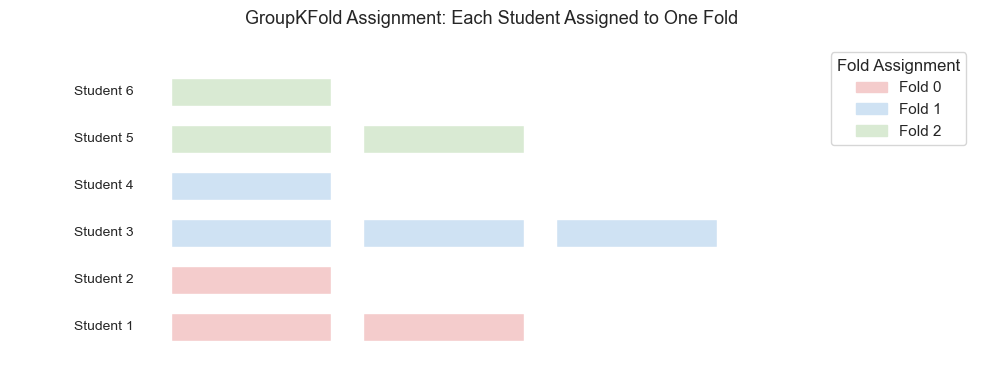

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 学生样本，每个学生可能有多个课程记录
students = {
    'Student 1': ['Course A', 'Course B'],
    'Student 2': ['Course A'],
    'Student 3': ['Course A', 'Course B', 'Course C'],
    'Student 4': ['Course B'],
    'Student 5': ['Course A', 'Course C'],
    'Student 6': ['Course C']
}

# 假设的 GroupKFold 分组结果（每个学生只能属于一个 fold）
group_assignments = {
    'Student 1': 0,
    'Student 2': 0,
    'Student 3': 1,
    'Student 4': 1,
    'Student 5': 2,
    'Student 6': 2
}

# 定义配色与图例标签
colors = ['#f4cccc', '#cfe2f3', '#d9ead3']
fold_labels = ['Fold 0', 'Fold 1', 'Fold 2']

# 开始绘图
fig, ax = plt.subplots(figsize=(10, 4))
y_pos = 0

for student, courses in students.items():
    x_start = 0
    for course in courses:
        ax.broken_barh([(x_start, 1)], (y_pos - 0.3, 0.6),
                       facecolors=colors[group_assignments[student]])
        x_start += 1.2
    ax.text(-0.6, y_pos, student, va='center', fontsize=10)
    y_pos += 1

# 添加图例
legend_patches = [mpatches.Patch(color=colors[i], label=fold_labels[i]) for i in range(3)]
ax.legend(handles=legend_patches, loc='upper right', title='Fold Assignment')

# 美化设置
ax.set_ylim(-1, len(students))
ax.set_xlim(-1, 5)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('GroupKFold Assignment: Each Student Assigned to One Fold', fontsize=13, pad=15)
ax.axis('off')

plt.tight_layout()

# 保存图片（可修改路径）
plt.savefig("groupkfold_assignment.png", dpi=300)
plt.show()


In [19]:
# -*- coding: utf-8 -*-
import os, re
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
USE_XGBOOST = True
try:
    from xgboost import XGBClassifier
except Exception:
    USE_XGBOOST = False
import joblib

DATA_PATH = r"G:\DSP DATA SET\df_final.csv"
PRETRAINED_MODEL_PATH = r"G:\DSP DATA SET\xgb_model.pkl"  # 可设为 None
OUTPUT_T41_CSV = "table_4_1_pipeline_stability.csv"
OUTPUT_T42_CSV = "table_4_2_scenario_predictions.csv"
TARGET_COL = "target"
GROUP_COL = "id_student"
RANDOM_STATE = 42
N_RUNS_PIPELINE = 3
SCENARIO_SAMPLE_N = 200

def safe_fit(model, X, y):
    try:
        return model.fit(X, y)
    except ValueError as e:
        if "feature_names" in str(e) or "QuantileDMatrix" in str(e):
            return model.fit(np.asarray(X), y)
        raise

def safe_predict_proba(model, X):
    try:
        return model.predict_proba(X)
    except ValueError as e:
        if "feature_names" in str(e) or "QuantileDMatrix" in str(e):
            return model.predict_proba(np.asarray(X))
        raise

df = pd.read_csv(DATA_PATH)
bool_cols = df.select_dtypes(include=["bool"]).columns.tolist()
if bool_cols:
    df[bool_cols] = df[bool_cols].astype(int)

all_cols = df.columns.tolist()
def find_col(cands, pool):
    for rx in cands:
        pat = re.compile(rx, flags=re.IGNORECASE)
        for c in pool:
            if pat.search(c): return c
    return None

CLICK_TOTAL_COL = find_col(
    [r"^total[_\-]?clicks[_\-]?28d$", r"^total[_\-]?clicks$", r"^sum[_\-]?clicks[_\-]?28d$", r"^sum[_\-]?clicks?$", r"^sum[_\-]?click$"],
    all_cols
) or "total_clicks_28d"
HAS_SUBMITTED_COL = find_col([r"submitted.*28", r"has.*submit.*28", r"submit.*any.*28", r"submitted_any", r"has[_\-]?submitted"], all_cols)
ASSIGN_AVG_COL = find_col([r"(assign|assessment).*avg.*score.*28", r"avg.*score.*28", r"score.*mean.*28"], all_cols)
SUB_DELAY_COL = find_col([r"(avg|mean).*submi.*delay.*28", r"delay.*28", r"lag.*submi.*28"], all_cols)
available_resource_cols = [c for c in all_cols if c.lower().startswith("resource_clicks_")]

id_like = {"id_student", "code_module", "code_presentation"}
feature_cols = [c for c in all_cols if c not in {TARGET_COL} and c not in id_like]

print("\n[INFO] Detected columns:")
print("  CLICK_TOTAL_COL:", CLICK_TOTAL_COL if CLICK_TOTAL_COL in all_cols else "NOT FOUND")
print("  HAS_SUBMITTED_COL:", HAS_SUBMITTED_COL or "NOT FOUND")
print("  ASSIGN_AVG_COL:", ASSIGN_AVG_COL or "NOT FOUND")
print("  SUB_DELAY_COL:", SUB_DELAY_COL or "NOT FOUND")
print(f"  Resource click cols (n={len(available_resource_cols)}):", available_resource_cols[:5], "..." if len(available_resource_cols) > 5 else "")

numeric_guess = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in feature_cols if c in numeric_guess]
cat_cols = [c for c in feature_cols if c not in num_cols]

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", build_ohe())
])
preprocess = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_cols),
                  ("cat", categorical_transformer, cat_cols)],
    remainder="drop"
)

def build_model():
    if USE_XGBOOST:
        model = XGBClassifier(
            n_estimators=300, max_depth=5, learning_rate=0.05,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
            random_state=RANDOM_STATE, n_jobs=-1, eval_metric="logloss"
        )
    else:
        model = RandomForestClassifier(n_estimators=400, max_depth=None, random_state=RANDOM_STATE, n_jobs=-1)
    return Pipeline(steps=[("prep", preprocess), ("clf", model)])

def run_pipeline_once(df_in: pd.DataFrame, random_state: int = 0):
    df_local = df_in.copy()
    n_samples = df_local.shape[0]
    n_features = len(feature_cols)
    missing_ratio = df_local[feature_cols].isna().mean().mean()
    X = df_local[feature_cols]; y = df_local[TARGET_COL].astype(int)
    groups = df_local[GROUP_COL] if GROUP_COL in df_local.columns else None
    model = build_model()
    if groups is not None:
        gkf = GroupKFold(n_splits=5)
        train_idx, test_idx = next(gkf.split(X, y, groups=groups))
    else:
        train_idx, test_idx = train_test_split(np.arange(len(df_local)), test_size=0.2, random_state=random_state, stratify=y)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    safe_fit(model, X_train, y_train)
    y_prob = safe_predict_proba(model, X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    prep = model.named_steps["prep"]
    Xt = prep.transform(X_train)
    transformed_dim = Xt.shape[1]
    return {
        "run_seed": random_state,
        "sample_count": int(n_samples),
        "raw_feature_count": int(n_features),
        "missing_ratio_mean": float(missing_ratio),
        "transformed_feature_dim": int(transformed_dim),
        "quick_auc": float(auc)
    }, model

t41_results, last_model = [], None
for i in range(N_RUNS_PIPELINE):
    stats, model_i = run_pipeline_once(df, random_state=RANDOM_STATE + i)
    t41_results.append(stats); last_model = model_i
t41_df = pd.DataFrame(t41_results)
t41_df.to_csv(OUTPUT_T41_CSV, index=False)
print("\n=== Table 4.1 (pipeline stability) ===")
print(t41_df); print(f"Saved to: {os.path.abspath(OUTPUT_T41_CSV)}")

if PRETRAINED_MODEL_PATH and os.path.exists(PRETRAINED_MODEL_PATH):
    print(f"\n[INFO] Loading pretrained model from: {PRETRAINED_MODEL_PATH}")
    model = joblib.load(PRETRAINED_MODEL_PATH)
else:
    print("\n[INFO] Using the model trained during stability runs.")
    model = last_model

X = df[feature_cols]; y = df[TARGET_COL].astype(int)
if GROUP_COL in df.columns:
    gkf = GroupKFold(n_splits=5)
    train_idx, test_idx = next(gkf.split(X, y, groups=df[GROUP_COL]))
else:
    train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.2, random_state=RANDOM_STATE, stratify=y)

X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
safe_fit(model, X_train, y_train)

rng = np.random.default_rng(RANDOM_STATE)
sample_idx = rng.choice(X_test.index, size=min(SCENARIO_SAMPLE_N, len(X_test)), replace=False)
X_base = X_test.loc[sample_idx].copy()

click_cols = []
if CLICK_TOTAL_COL in X_base.columns: click_cols.append(CLICK_TOTAL_COL)
click_cols += [c for c in available_resource_cols if c in X_base.columns]
click_p95 = X_train[click_cols].quantile(0.95).to_dict() if click_cols else {}
score_high, delay_zero = 95.0, 0.0

def scenario_normal(df_in): return df_in.copy()
def scenario_low_activity(df_in):
    df_s = df_in.copy()
    for c in click_cols: df_s[c] = 0.0
    if HAS_SUBMITTED_COL and HAS_SUBMITTED_COL in df_s.columns: df_s[HAS_SUBMITTED_COL] = 0
    if ASSIGN_AVG_COL and ASSIGN_AVG_COL in df_s.columns: df_s[ASSIGN_AVG_COL] = 0.0
    if SUB_DELAY_COL and SUB_DELAY_COL in df_s.columns: df_s[SUB_DELAY_COL] = 28.0
    return df_s
def scenario_high_activity(df_in):
    df_s = df_in.copy()
    for c in click_cols: df_s[c] = click_p95.get(c, df_s[c].max() if c in df_s.columns else 0.0)
    if HAS_SUBMITTED_COL and HAS_SUBMITTED_COL in df_s.columns: df_s[HAS_SUBMITTED_COL] = 1
    if ASSIGN_AVG_COL and ASSIGN_AVG_COL in df_s.columns: df_s[ASSIGN_AVG_COL] = score_high
    if SUB_DELAY_COL and SUB_DELAY_COL in df_s.columns: df_s[SUB_DELAY_COL] = delay_zero
    return df_s

scenarios = {
    "Normal": scenario_normal,
    "Extremely Low Activity": scenario_low_activity,
    "Extremely High Activity": scenario_high_activity
}
rows = []
for name, func in scenarios.items():
    X_s = func(X_base)
    y_prob = safe_predict_proba(model, X_s)[:, 1]
    rows.append({
        "scenario": name,
        "n_samples": int(len(X_s)),
        "mean_predicted_probability": float(np.mean(y_prob)),
        "std_predicted_probability": float(np.std(y_prob))
    })
t42_df = pd.DataFrame(rows)
t42_df.to_csv(OUTPUT_T42_CSV, index=False)
print("\n=== Table 4.2 (scenario predictions) ===")
print(t42_df); print(f"Saved to: {os.path.abspath(OUTPUT_T42_CSV)}")

y_base_prob = safe_predict_proba(model, X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_base_prob)
print(f"\n[Context] Held-out Test AUC: {auc_test:.4f}")



[INFO] Detected columns:
  CLICK_TOTAL_COL: total_clicks_28d
  HAS_SUBMITTED_COL: NOT FOUND
  ASSIGN_AVG_COL: NOT FOUND
  SUB_DELAY_COL: NOT FOUND
  Resource click cols (n=18): ['resource_clicks_dataplus', 'resource_clicks_dualpane', 'resource_clicks_externalquiz', 'resource_clicks_forumng', 'resource_clicks_glossary'] ...

=== Table 4.1 (pipeline stability) ===
   run_seed  sample_count  raw_feature_count  missing_ratio_mean  \
0        42         32593                 56                 0.0   
1        43         32593                 56                 0.0   
2        44         32593                 56                 0.0   

   transformed_feature_dim  quick_auc  
0                       56   0.824072  
1                       56   0.824072  
2                       56   0.824072  
Saved to: C:\Users\dell\table_4_1_pipeline_stability.csv

[INFO] Loading pretrained model from: G:\DSP DATA SET\xgb_model.pkl


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:35:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Table 4.2 (scenario predictions) ===
                  scenario  n_samples  mean_predicted_probability  \
0                   Normal        200                    0.311838   
1   Extremely Low Activity        200                    0.430962   
2  Extremely High Activity        200                    0.322630   

   std_predicted_probability  
0                   0.232926  
1                   0.220887  
2                   0.206244  
Saved to: C:\Users\dell\table_4_2_scenario_predictions.csv

[Context] Held-out Test AUC: 0.8129


In [23]:
# -*- coding: utf-8 -*-
"""
Generate Table 4.3 (Model Performance) and Figure 4.2 (Feature Importance Comparison)
- Robust to bool/nullable-boolean dtypes
- Uses GroupKFold if id_student exists
- Saves outputs into your pictures folder
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from pandas.api.types import is_bool_dtype

# Try XGBoost; fallback if not available
USE_XGB = True
try:
    from xgboost import XGBClassifier
except Exception:
    USE_XGB = False

# ===== Paths =====
DATA_PATH = r"G:\DSP DATA SET\df_final.csv"
OUT_DIR = r"C:\Users\dell\Desktop\DSP\pictures"
os.makedirs(OUT_DIR, exist_ok=True)
OUTPUT_T43_CSV = os.path.join(OUT_DIR, "table_4_3_model_performance.csv")
OUTPUT_F42_PNG = os.path.join(OUT_DIR, "figure_4_2_feature_importance.png")

TARGET_COL = "target"
GROUP_COL = "id_student"

# ===== Load data =====
df = pd.read_csv(DATA_PATH)

# ----- Force all boolean-like columns to numeric (0/1) to avoid SimpleImputer(bool) error -----
feature_cols_all = [c for c in df.columns if c != TARGET_COL]
bool_like_cols = [c for c in feature_cols_all if is_bool_dtype(df[c])]
if bool_like_cols:
    # cast True/False -> 1.0/0.0; pd.NA -> np.nan
    for c in bool_like_cols:
        df[c] = df[c].astype("float")

# ===== Feature selection =====
id_like = {"id_student", "code_module", "code_presentation"}
feature_cols = [c for c in df.columns if c not in {TARGET_COL} and c not in id_like]

# Re-detect dtypes after bool casting
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

print(f"[INFO] Numeric cols: {len(num_cols)}, Categorical cols: {len(cat_cols)}, Bool casted: {len(bool_like_cols)}")

# ===== OneHot compatibility (sparse_output vs sparse) =====
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# ===== Preprocessing =====
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", build_ohe())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# ===== Train / test split (GroupKFold if available) =====
X = df[feature_cols]
y = df[TARGET_COL].astype(int)

if GROUP_COL in df.columns:
    gkf = GroupKFold(n_splits=5)
    train_idx, test_idx = next(gkf.split(X, y, groups=df[GROUP_COL]))
else:
    train_idx, test_idx = train_test_split(
        np.arange(len(df)), test_size=0.2, random_state=42, stratify=y
    )

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# ===== Define models =====
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
}
if USE_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, max_depth=5, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1, eval_metric="logloss"
    )

# ===== Train, evaluate, collect importances =====
rows = []
fi_dict = {}   # model -> top10 feature importances (DataFrame)

for name, base_model in models.items():
    clf = Pipeline([
        ("prep", preprocess),
        ("clf", base_model)
    ])
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    rows.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4),
        "AUC": round(auc, 4)
    })

    # ----- Feature names after preprocessing -----
    ohe_feats = []
    if cat_cols:
        ohe = clf.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
        try:
            ohe_feats = ohe.get_feature_names_out(cat_cols).tolist()
        except Exception:
            ohe_feats = ohe.get_feature_names(cat_cols).tolist()
    all_feature_names = num_cols + ohe_feats

    # ----- Importances / Coeffs from the fitted estimator inside the pipeline -----
    est = clf.named_steps["clf"]
    if hasattr(est, "coef_"):  # Logistic Regression
        imp = np.abs(est.coef_[0])
    elif hasattr(est, "feature_importances_"):  # RF / XGB
        imp = est.feature_importances_
    else:
        imp = np.zeros(len(all_feature_names))

    fi_df = pd.DataFrame({"feature": all_feature_names, "importance": imp}) \
                .sort_values("importance", ascending=False).head(10)
    fi_dict[name] = fi_df

# ===== Save Table 4.3 =====
t43 = pd.DataFrame(rows)
t43.to_csv(OUTPUT_T43_CSV, index=False)
print(f"[INFO] Table 4.3 saved -> {OUTPUT_T43_CSV}")
print(t43)

# ===== Plot Figure 4.2 =====
# 三列子图：LogReg, RF, XGB（若无XGB则两列）
n_models = len(fi_dict)
fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 6), sharey=True)

if n_models == 1:
    axes = [axes]

for ax, (model_name, df_imp) in zip(axes, fi_dict.items()):
    ax.barh(df_imp["feature"], df_imp["importance"])
    ax.invert_yaxis()
    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel("Importance")

plt.suptitle("Top-10 Feature Importance for Three Models", fontsize=16)
plt.tight_layout()
plt.savefig(OUTPUT_F42_PNG, dpi=300, bbox_inches="tight")
plt.close()
print(f"[INFO] Figure 4.2 saved -> {OUTPUT_F42_PNG}")


[INFO] Numeric cols: 56, Categorical cols: 0, Bool casted: 30


E:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[INFO] Table 4.3 saved -> C:\Users\dell\Desktop\DSP\pictures\table_4_3_model_performance.csv
                 Model  Accuracy  Precision  Recall  F1-score     AUC
0  Logistic Regression    0.7905     0.7412  0.5220    0.6126  0.7888
1        Random Forest    0.8102     0.8023  0.5336    0.6409  0.8228
2              XGBoost    0.8070     0.7768  0.5500    0.6440  0.8241
[INFO] Figure 4.2 saved -> C:\Users\dell\Desktop\DSP\pictures\figure_4_2_feature_importance.png


In [24]:
# -*- coding: utf-8 -*-
"""
Generate Figure 4.3: Multi-model curves (ROC, PR, Precision/Recall vs Threshold, F1/Accuracy vs Threshold)
and export per-threshold metrics.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score
)
from pandas.api.types import is_bool_dtype

# Try XGBoost; fallback if not available
USE_XGB = True
try:
    from xgboost import XGBClassifier
except Exception:
    USE_XGB = False

# ===== Paths =====
DATA_PATH = r"G:\DSP DATA SET\df_final.csv"
OUT_DIR = r"C:\Users\dell\Desktop\DSP\pictures"
os.makedirs(OUT_DIR, exist_ok=True)
FIG_PATH = os.path.join(OUT_DIR, "figure_4_3_model_curves.png")
THRESH_CSV = os.path.join(OUT_DIR, "table_4_3_threshold_metrics.csv")

TARGET_COL = "target"
GROUP_COL = "id_student"

# ===== Load data =====
df = pd.read_csv(DATA_PATH)

# Cast all boolean-like columns to float (True->1.0, False->0.0) for safe imputation
feature_cols_all = [c for c in df.columns if c != TARGET_COL]
bool_like_cols = [c for c in feature_cols_all if is_bool_dtype(df[c])]
for c in bool_like_cols:
    df[c] = df[c].astype("float")

# Feature columns (drop obvious identifiers)
id_like = {"id_student", "code_module", "code_presentation"}
feature_cols = [c for c in df.columns if c not in {TARGET_COL} and c not in id_like]

# Split numeric / categorical
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

# OneHotEncoder compatibility
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Preprocess
numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", build_ohe())
])
preprocess = ColumnTransformer(
    [("num", numeric_transformer, num_cols),
     ("cat", categorical_transformer, cat_cols)],
    remainder="drop"
)

# Train/test split (GroupKFold if available)
X = df[feature_cols]
y = df[TARGET_COL].astype(int)

if GROUP_COL in df.columns:
    gkf = GroupKFold(n_splits=5)
    train_idx, test_idx = next(gkf.split(X, y, groups=df[GROUP_COL]))
else:
    train_idx, test_idx = train_test_split(
        np.arange(len(df)), test_size=0.2, random_state=42, stratify=y
    )

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
}
if USE_XGB:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300, max_depth=5, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1, eval_metric="logloss"
    )

# Storage
curve_data = {}       # model -> dict with fpr,tpr,roc_auc, prec, rec, ap, y_prob
thresh_rows = []      # rows for per-threshold metrics

# Train, predict, collect metrics
for name, base_model in models.items():
    clf = Pipeline([("prep", preprocess), ("clf", base_model)])
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # PR
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)

    curve_data[name] = {
        "y_prob": y_prob, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc,
        "prec": prec, "rec": rec, "ap": ap
    }

# Build threshold sweep (common thresholds for fairness)
thresholds = np.linspace(0.0, 1.0, 101)
for name, d in curve_data.items():
    y_prob = d["y_prob"]
    for th in thresholds:
        y_hat = (y_prob >= th).astype(int)
        acc = accuracy_score(y_test, y_hat)
        pre = precision_score(y_test, y_hat, zero_division=0)
        rec = recall_score(y_test, y_hat, zero_division=0)
        f1  = f1_score(y_test, y_hat, zero_division=0)
        thresh_rows.append({
            "model": name, "threshold": th,
            "accuracy": acc, "precision": pre, "recall": rec, "f1": f1
        })

thresh_df = pd.DataFrame(thresh_rows)
thresh_df.to_csv(THRESH_CSV, index=False)
print(f"[INFO] Threshold metrics saved -> {THRESH_CSV}")

# ===== Plot: 2x2 multi-panel figure =====
plt.figure(figsize=(14, 10))

# (1) ROC
ax1 = plt.subplot(2, 2, 1)
for name, d in curve_data.items():
    ax1.plot(d["fpr"], d["tpr"], label=f"{name} (AUC={d['roc_auc']:.3f})")
ax1.plot([0, 1], [0, 1], "--", color="gray", linewidth=1)
ax1.set_title("ROC Curves")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend(loc="lower right")

# (2) PR
ax2 = plt.subplot(2, 2, 2)
for name, d in curve_data.items():
    ax2.plot(d["rec"], d["prec"], label=f"{name} (AP={d['ap']:.3f})")
ax2.set_title("Precision–Recall Curves")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend(loc="lower left")

# (3) Precision & Recall vs Threshold
ax3 = plt.subplot(2, 2, 3)
for name in models.keys():
    sub = thresh_df[thresh_df["model"] == name]
    ax3.plot(sub["threshold"], sub["precision"], label=f"{name} – Precision")
    ax3.plot(sub["threshold"], sub["recall"], linestyle="--", label=f"{name} – Recall")
ax3.set_title("Precision / Recall vs Threshold")
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Score")
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.legend(ncol=2, fontsize=8)

# (4) F1 & Accuracy vs Threshold
ax4 = plt.subplot(2, 2, 4)
for name in models.keys():
    sub = thresh_df[thresh_df["model"] == name]
    ax4.plot(sub["threshold"], sub["f1"], label=f"{name} – F1")
    ax4.plot(sub["threshold"], sub["accuracy"], linestyle="--", label=f"{name} – Accuracy")
ax4.set_title("F1 / Accuracy vs Threshold")
ax4.set_xlabel("Threshold")
ax4.set_ylabel("Score")
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.legend(ncol=2, fontsize=8)

plt.tight_layout()
plt.savefig(FIG_PATH, dpi=300, bbox_inches="tight")
plt.close()
print(f"[INFO] Figure 4.3 saved -> {FIG_PATH}")


E:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[INFO] Threshold metrics saved -> C:\Users\dell\Desktop\DSP\pictures\table_4_3_threshold_metrics.csv
[INFO] Figure 4.3 saved -> C:\Users\dell\Desktop\DSP\pictures\figure_4_3_model_curves.png


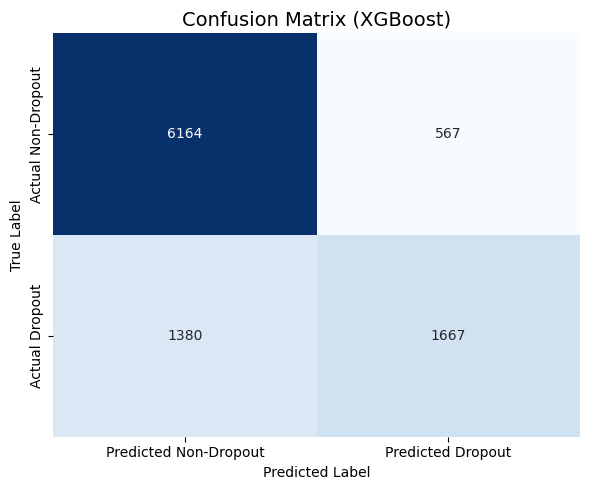

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# XGBoost confusion matrix values
# 格式: [[TN, FP], [FN, TP]]
cm = np.array([[6164, 567],
               [1380, 1667]])

# 类别标签
labels = ["Actual Non-Dropout", "Actual Dropout"]
pred_labels = ["Predicted Non-Dropout", "Predicted Dropout"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pred_labels, yticklabels=labels, cbar=False)

plt.title("Confusion Matrix (XGBoost)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


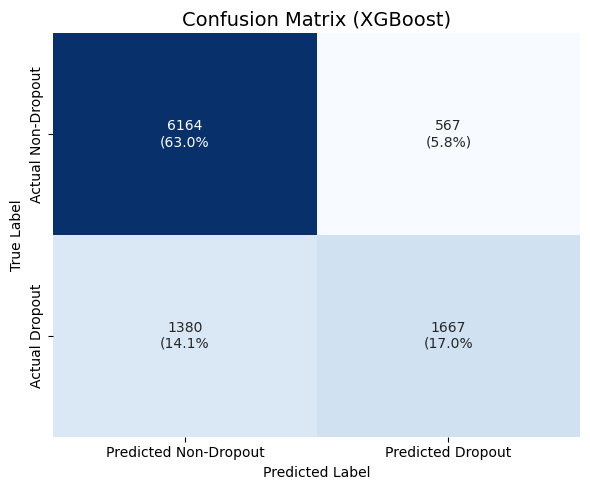

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# XGBoost confusion matrix
cm = np.array([[6164, 567],
               [1380, 1667]])

# 总样本数
total = cm.sum()

# 格子里显示数量+百分比
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm[i, j]/total:.1%})"

# 类别标签
labels = ["Actual Non-Dropout", "Actual Dropout"]
pred_labels = ["Predicted Non-Dropout", "Predicted Dropout"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt="", cmap="Blues",
            xticklabels=pred_labels, yticklabels=labels, cbar=False)

plt.title("Confusion Matrix (XGBoost)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


NameError: name 'model' is not defined